# Modulo 03 Tipificación - Nextclade
###Nota 1: Los comandos de bash empiezan con  "!"
###Nota 2: El las casillad de código los comentarios empiezan con "#"
###Nota 3: Durante la instalación de conda y los ambientes conda es posible que se reinicie la conexión al servidor. Esto es normal y puede continuar trabajando.

En este Notebook se realizarán los pasos para realizar la tipificación de SARS-CoV-2 utilizando las herramientas de Nextclade.

## ✔ Resultados esperados
*   Instalar Nextclade
*   Descargar el set de datos para SARS-CoV-2
*   Ejecutar la caracterización en Nextclade
*   Explorar el informe utilizando Pandas
*   Obtener el archivo para visualizar los resultados en Auspice
*   Analizar los resultados







## [0] Instalación de Conda/Mamba
#### Conda/Mamba es una herramienta que permite manejar paquetes y ambientes.
#### Los ambientes son espacios aislados donde podrá instalar y ejecutar herramientas específicas para un projecto
#### Los programas que vamos a usar se encuentran disponibles como ambientes de Conda

In [1]:
#verificar la versión de Python
#para la mayoría de programas, usar la opción --version nos devolverá la versión del programa
!python --version

Python 3.10.12


In [2]:
#Usando instalador de bibliotecas de Python (pip) para instalar conda/mamba.

  #whoami es un comando de bash que nos dice qué usuario está activo
!whoami
  #pip es el instalador de bibliotecas de python
!pip install -q condacolab

#Código en Python
  #importando la libreria de herramientas de condacolab
import condacolab
  #instalar conda
condacolab.install()

#print("Reiniciando el kernel...")
#get_ipython().kernel.do_shutdown(True)
#!conda init
#print("Reiniciando el kernel...")
#get_ipython().kernel.do_shutdown(True)

#Verificación versión conda
!conda --version

root
⏬ Downloading https://github.com/conda-forge/miniforge/releases/download/23.1.0-1/Mambaforge-23.1.0-1-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:14
🔁 Restarting kernel...
conda 23.1.0


## [1] Descarga de datos
### Descargue los archivos de secuencia en formato fasta desde el repositorio usando el comando wget

In [ ]:
#Los datos de sequenciación en formato fasta se encuentran depositados en el repositorio:
  #wget ws un programa que recupera archivos desde servidores web
#!wget https://github.com/

  #ls es el comando que nos devuelve la lista de archivos del directorio actual
!ls

In [1]:
#Código en Python para cargar archivos

  #esta línea carga las herramientas de "files" que están disponibles en la librería "google.colab"
from google.colab import files

  #
uploaded = files.upload()
!ls

Saving secuenciasSARS.fas to secuenciasSARS.fas
condacolab_install.log	sample_data  secuenciasSARS.fas


## [2] Instalación de Nextclade y configuración
#### Vamos a usar Nextclade para caracterizar las secuencias de SARS-CoV-2
####Nextclade está disponible como ambiente de conda

Creando ambiente para caracterizar genomas usando Nextclade

In [2]:
#Crear ambiente de conda con las herramientas de
  #intalación de Nextclade como ambiente de conda

  #comando de conda para ver los ambientes disponibles
!conda env list
  #instalación del programa Nextclade dentro del ambiente "base"
  # la opción -c se usa para indicar el repositorio de paquetes y programas. Nextclade está en el repositorio bioconda
!conda install -c bioconda nextclade --quiet

#Reiniciando el shell con las herramientas instaladas
print("Reiniciando el kernel...")
get_ipython().kernel.do_shutdown(True)


# conda environments:
#
base                     /usr/local

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - nextclade


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.11.17 |       hbcca054_0         151 KB  conda-forge
    certifi-2023.11.17         |     pyhd8ed1ab_0         155 KB  conda-forge
    nextclade-3.0.0            |       h9ee0642_0         3.7 MB  bioconda
    openssl-3.2.0              |       hd590300_1         2.7 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         6.8 MB

The following NEW packages will be INSTALLED:

  nextclade          bioconda/linux-64::nextclade-3.0.0-h9ee0642_0 

The following packages will be UPDATED:

  ca-certificates                      2022.12.7-ha878542_

{'status': 'ok', 'restart': True}

#### Para verificar la descarga podemos usar el comando con la opción --version y ver que esté funcionando y la versión que instalamos

In [1]:
#Ver versión del programa Nextclade
!nextclade --version

nextclade 3.0.0


#### Antes de continuar veamos la forma en que se escriben los comandos del programa Nextclade llamando la opción de ayuda -h
#### De esta manera podemos conocer qué opciones de ejecución tiene, qué archivos se necesitan, cuáles son los parámetros necesarios, y qué opciones hay disponibles

In [8]:
#llama la ayuda de nextclade para ver las opciones de ejecución
!nextclade -h

Viral genome alignment, mutation calling, clade assignment, quality checks and phylogenetic placement.

Usage: nextclade [OPTIONS] <COMMAND>

Commands:
  completions      Generate shell completions
  run              Run sequence analysis: alignment, mutation calling, clade assignment, quality checks and phylogenetic placement
  dataset          List and download available Nextclade datasets (pathogens)
  sort             Sort sequences according to the inferred Nextclade dataset (pathogen)
  read-annotation  Read genome annotation and present it in Nextclade's internal formats. This is mostly only useful for Nextclade maintainers and the most curious users. Note that these internal formats have no stability guarantees and can be changed at any time without notice
  help-markdown    Print command-line reference documentation in Markdown format
  help             Print this message or the help of the given subcommand(s)

Options:
  -h, --help     Print help (see more with '--help')
  -V

#### La ayuda nos ha mostrado hay varios comando disponibles dentro del programa, entre esos los comandos para correr el análisis (nextclade run), y los comandos para ver y descargar sets de datos (nextclade dataset)
#### Para cada uno de estos comandos también podemos invocar la opción -h para ver la ayuda y conocer su sintaxis y opciones

## [3] Descarga de sets de datos para configurar y realizar análisis

###Nextclade tiene sets de datos para analizar distintos virus, entre ellos SARS-CoV-2, RSV, y algunos tipos de Influenza. Vamos a usarlo para tipificar SARS-CoV-2.

### Primero revisemos la lista de virus que podemos analizar con Nextclade
### Para eso usamos el comando: nextclade dataset list

In [10]:
#Ver la ayuda del comando nextclade datasets para conocer sus opciones de ejecución
!nextclade dataset -h

List and download available Nextclade datasets (pathogens)

Usage: nextclade dataset [OPTIONS] <COMMAND>

Commands:
  list  List available Nextclade datasets
  get   Download available Nextclade datasets
  help  Print this message or the help of the given subcommand(s)

Options:
  -h, --help  Print help (see more with '--help')

Verbosity:
      --verbosity <VERBOSITY>  Set verbosity level of console output [default: warn] [possible values: off, error, warn, info, debug, trace]
      --silent                 Disable all console output. Same as `--verbosity=off`
  -v, --verbose...             Make console output more verbose. Add multiple occurrences to increase verbosity further
  -q, --quiet...               Make console output more quiet. Add multiple occurrences to make output even more quiet


#### Viendo la ayuda del comando 'nextclade dataset' vemos que tiene dentro los comandos 'list' para ver la lista de sets de datos, y el comando 'get' para descargarlos.
#### para estos comandos también podemos invocar ayuda usando la opción -h

In [11]:
#ver la ayuda del comando 'nextclade dataset list'
!nextclade dataset list -h

List available Nextclade datasets

Usage: nextclade dataset list [OPTIONS]

Options:
  -n, --name <NAME>              Restrict list to datasets with this *exact* name
  -s, --search <SEARCH>          Search datasets by name or by reference
  -t, --tag <TAG>                Restrict list to datasets with this exact version tag
      --include-incompatible     Include dataset versions that are incompatible with this version of Nextclade CLI
      --include-deprecated       Include deprecated datasets
      --no-experimental          Exclude experimental datasets
      --no-community             Exclude community datasets and only show official datasets
      --json                     Print output in JSON format
      --only-names               Print only names of the datasets, without any other details
      --server <SERVER>          Use custom dataset server [default: https://data.clades.nextstrain.org/v3]
  -x, --proxy <PROXY>            Pass all traffic over proxy server. HTTP, HTTPS

#### El comando 'nextclade dataset list' se puede usar solo, pero también tiene opciones para limitar la búsqueda. Por ahora queremos una lista de todos los sets de datos disponibles

In [1]:
#Listar los datasets disponibles en nextclade
#dataset list genera la lista de datasets disponibles
  #usar los comandos de nextclade para ver la lista de sets de datos disponibles para realizar análisis
  #con la señal ">" vamos a guardar esta lista en un documento de extensión .csv que podemos revisar después
!nextclade dataset list > nextclade_dataset_list.csv

print("Se ha guardado la lista de datasets en: nextclade_dataset_list.csv")
#Ver contenido del directorio actual
!ls

Se ha guardado la lista de datasets en: nextclade_dataset_list.csv
condacolab_install.log	nextclade_dataset_list.csv  sample_data  secuenciasSARS.fas


#### Con la herramienta cat podemos ver el contenido del archivo que creamos

#### Explore esta lista para ver los sets de datos disponibles y los organismos que puede analizar con nextclade

#### Podemos encontrar los nombres de los sets de datos en la columna 'name', su versión corta marcada como "shortcuts", o en la columna "attributes". Esta información se necesita para descargarlos

In [14]:
 # el comando cat nos muestra el contenido del archivo donde guardamos la lista de sets de datos
!cat nextclade_dataset_list.csv

╭──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┬─────────────────────────────────────────────────────────┬───────────────────────╮
│ name                                                                                                                                 │ attributes                                              │ versions              │
╞══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╪═════════════════════════════════════════════════════════╪═══════════════════════╡
│ nextstrain/sars-cov-2/wuhan-hu-1/orfs                                                                                                │ "name"="SARS-CoV-2"                                     │ 2024-01-16--20-31-02Z │
│ (shortcuts: "sars-cov-2", "nextstrain/sars-cov-2", "nextstrain/sars-cov-2/wuhan-hu-1")                                    

### El dataset que queremos es el primero de la lista, el nombre en la columna de atributos es "sars-cov-2"
#### ❓Hay más sets de datos para este virus. ¿Escriba debajo para qué cree que nos pueden servir estos sets de datos alternos?


###Descarguemos el set de datos 'sars-cov-2' usando el comando 'nextclade dataset get'. Primero podemos ver la forma de ejecutar el comando con la opción de ayuda -h

In [13]:
#ver ayuda del comando 'nextclade dataset get'
!nextclade dataset get -h

Download available Nextclade datasets

Usage: nextclade dataset get [OPTIONS] --name <NAME> <--output-dir <OUTPUT_DIR>|--output-zip <OUTPUT_ZIP>>

Options:
  -n, --name <NAME>              Name of the dataset to download. Type `nextclade dataset list` to view available datasets
  -t, --tag <TAG>                Version tag of the dataset to download
      --server <SERVER>          Use custom dataset server [default: https://data.clades.nextstrain.org/v3]
  -o, --output-dir <OUTPUT_DIR>  Path to directory to write dataset files to
  -z, --output-zip <OUTPUT_ZIP>  Path to resulting dataset zip file
  -x, --proxy <PROXY>            Pass all traffic over proxy server. HTTP, HTTPS, and SOCKS5 proxies are supported
      --proxy-user <PROXY_USER>  Username for basic authentication on proxy server, if applicable. Only valid when `--proxy` is also supplied. `--proxy-user` and `--proxy-pass` must be either both specified or both omitted
      --proxy-pass <PROXY_PASS>  Password for basic authen

#### El comando 'nextclade dataset get' requiere el nombre del set de datos (--name) y el nombre de la salida, ya sea en un directorio (--output-dir) o una carpeta comprimida (--output-zip)
#### Procedamos a descargar el set de datos para SARS-CoV-2

In [2]:
  #dataset get descarga los archivos del dataset de nombre --name en el directorio --out
!nextclade dataset get --name sars-cov-2 --output-dir sars-cov-2
  #ls . nos muestra la lista de archivos y directorios dentro de nuestra ubicación actual (.)
  #debe poder ver el directorio que descargamos con el set de datos
!ls .


condacolab_install.log	sample_data  sars-cov-2  secuenciasSARS.fas


El dataset de nextclade contiene información del genoma de referencia y los genes codificantes del virus con el fin de realizar una anotación completa, tipificación y caracterización de mutaciones de nt y aa

Use los comandos aprendidos para ver el contenido de estas carpetas

In [16]:
#complete este comando para ver la lista de archivos dentro del directorio sars-cov-2
!ls sars-cov-2/

CHANGELOG.md		pathogen.json  reference.fasta	tree.json
genome_annotation.gff3	README.md      sequences.fasta


## [4] Ejecutemos Nextclade
#### Como habiamos visto, el comando para realizar análisis con el programa Nextclade se llama 'nextclade run'
#### Primero podemos revisar la sintaxis y opciones de ejecución con la opción de ayuda -h

In [5]:
#ver la ayuda del comando 'nextclade run'
!nextclade run -h

Run sequence analysis: alignment, mutation calling, clade assignment, quality checks and phylogenetic placement

Usage: nextclade run [OPTIONS] [INPUT_FASTAS]...

Options:
  -h, --help  Print help (see more with '--help')

Inputs:
  [INPUT_FASTAS]...
          Path to one or multiple FASTA files with input sequences
  -D, --input-dataset <INPUT_DATASET>
          Path to a directory or a zip file containing a dataset
  -d, --dataset-name <DATASET_NAME>
          Name of the dataset to download and use during the run
  -r, --input-ref <INPUT_REF>
          Path to a FASTA file containing reference sequence. This file should contain exactly 1 sequence
  -a, --input-tree <INPUT_TREE>
          Path to Auspice JSON v2 file containing reference tree
  -p, --input-pathogen-json <INPUT_PATHOGEN_JSON>
          Path to a JSON file containing configuration and data specific to a pathogen
  -m, --input-annotation <INPUT_ANNOTATION>
          Path to a file containing genome annotation in GFF3 fo

#### 'nextclade run' requiere que especifiquemos opciones del set de datos de análisis (--input-dataset), y que proveemos un archivo con las secuencias en formato fasta (siempre como último parámetro). También podemos especificar qué archivos de salida queremos (--output-all) y en con qué nombre guardarlos (--output-basename)

In [6]:
#Ejecutar Nextclade con el set de datos de SARS-CoV-2 para tipificar y caracterizar nuestras secuencias
#El símbolo \ indica al servidor que el comando continua en la siguiente línea
#Nuestro archivo se llama secuenciasSARS.fasta
#el directorio de salida se llamará nextclade_out
!nextclade run\
--output-all=nextclade_out \
--input-dataset=./sars-cov-2 \
--output-basename=nextclade_sars \
secuenciasSARS.fas

print("Se ha ejecutado Nextclade para SARS-CoV-2")
print("Estos son los archivos de salida dentro del directorio nextclade_out: ")
print("")
#listar el contenido del directorio de
!ls nextclade_out

Se ha ejecutado Nextclade para SARS-CoV-2
Estos son los archivos de salida dentro del directorio nextclade_out: 

nextclade_sars.aligned.fasta
nextclade_sars.auspice.json
nextclade_sars.cds_translation.E.fasta.translation.fasta
nextclade_sars.cds_translation.M.fasta.translation.fasta
nextclade_sars.cds_translation.N.fasta.translation.fasta
nextclade_sars.cds_translation.ORF1a.fasta.translation.fasta
nextclade_sars.cds_translation.ORF1b.fasta.translation.fasta
nextclade_sars.cds_translation.ORF3a.fasta.translation.fasta
nextclade_sars.cds_translation.ORF6.fasta.translation.fasta
nextclade_sars.cds_translation.ORF7a.fasta.translation.fasta
nextclade_sars.cds_translation.ORF7b.fasta.translation.fasta
nextclade_sars.cds_translation.ORF8.fasta.translation.fasta
nextclade_sars.cds_translation.ORF9b.fasta.translation.fasta
nextclade_sars.cds_translation.S.fasta.translation.fasta
nextclade_sars.csv
nextclade_sars.json
nextclade_sars.ndjson
nextclade_sars.nwk
nextclade_sars.tsv


#### Obtenemos:

*   Un alineamiento de las secuencias frente a la referencia (.aligned.fasta)
*   Traducciones de los genes en formato fasta
*   Tablas con información de las características genómicas de las secuencias (.csv; .tsv; & .json)
*   Un árbol en formato newick con la ubicación de las muestras (.nwk)
*   Un archivo auspice.json con la visualización de la filogenia anotada con las características y mutaciones (.auspice.json)



## [5] Explorar los resultados usando Pandas
#### Excelente trabajo. Hasta este punto logramos obtener los archivos con la caracterización de nuestras secuencias del virus. Podemos descargar los archivos y explorarlos visualmente. Los siguientes pasos noss llevan más allá, y manipularemos los archivos desde la lína de comandos.


#### Para explorar las tablas obtenidas vamos a usar el programa Pandas. Pandas es una librería de Python especializada en el manejo de estructuras de datos.
####Con pandas podemos convertir los archivos en dataframes, y explorar las tablas programáticamente

####Pandas es una librería de python ya instalada pero primero la debemos cargar

In [30]:
#carga la librería de pandas con el nombre pd (solamente para tener que escribir menos letras)
import pandas as pd

#Cargar la tabla en formato csv como un dataframe de pandas llamdo df
df = pd.read_csv('/content/nextclade_out/nextclade_sars.csv', sep=";")

#Ver el dataframe en pantalla
df

,index,seqName,clade,Nextclade_pango,partiallyAliased,clade_nextstrain,clade_who,clade_display,qc.overallScore,qc.overallStatus,...,qc.frameShifts.status,qc.stopCodons.stopCodons,qc.stopCodons.totalStopCodons,qc.stopCodons.score,qc.stopCodons.status,totalPcrPrimerChanges,pcrPrimerChanges,failedCdses,warnings,errors
0,0,muestra01,23G,GK.1.6,XBB.1.5.70.1.6,23G,Omicron,23G (XBB.1.5.70),9.518368,good,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
1,1,muestra02,23D,EG.5,XBB.1.9.2.5,23D,Omicron,23D (XBB.1.9),7.091372,good,...,good,NaN,0,0,good,0,NaN,"ORF7a,ORF7b,ORF8,N,ORF9b","When processing gene ""ORF7a"": The extracted ge...",NaN
2,2,muestra03,23D,EG.5.2,XBB.1.9.2.5.2,23D,Omicron,23D (XBB.1.9),0.884993,good,...,good,NaN,0,0,good,0,NaN,"ORF6,ORF7a,ORF7b,ORF8,N,ORF9b","When processing gene ""ORF6"": The extracted gen...",NaN
3,3,muestra04,23D,EG.5.2,XBB.1.9.2.5.2,23D,Omicron,23D (XBB.1.9),4.340278,good,...,good,NaN,0,0,good,0,NaN,"ORF7a,ORF7b,ORF8,N,ORF9b","When processing gene ""ORF7a"": The extracted ge...",NaN
4,4,muestra05,23D,EG.5.2,XBB.1.9.2.5.2,23D,Omicron,23D (XBB.1.9),4.340278,good,...,good,NaN,0,0,good,0,NaN,"ORF7a,ORF7b,ORF8,N,ORF9b","When processing gene ""ORF7a"": The extracted ge...",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,muestra102,23I,JN.1,BA.2.86.1.1,23I,Omicron,23I (BA.2.86),1700.522977,bad,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
102,102,muestra103,23A,JD.1.1.1,XBB.1.5.102.1.1.1,23A,Omicron,23A (XBB.1.5),2480.408903,bad,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
103,103,muestra104,23F,JG.3,XBB.1.9.2.5.1.3.3,23F,Omicron,23F (EG.5.1),157.718193,bad,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN
104,104,muestra105,23E,GJ.1,XBB.2.3.3.1,23E,Omicron,23E (XBB.2.3),1150.459674,bad,...,good,NaN,0,0,good,0,NaN,NaN,NaN,NaN


####Ver encabezados de las columnas
#### La tabla de resultados tiene mas de 70 columnas!

Podemos hacer una lista de los encabezados de las columnas para ver qué tipo de información contiene usando el comando list()

In [8]:
# lista los encabezados de las columnas
list(df.columns)

['index',
 'seqName',
 'clade',
 'Nextclade_pango',
 'partiallyAliased',
 'clade_nextstrain',
 'clade_who',
 'clade_display',
 'qc.overallScore',
 'qc.overallStatus',
 'totalSubstitutions',
 'totalDeletions',
 'totalInsertions',
 'totalFrameShifts',
 'totalMissing',
 'totalNonACGTNs',
 'totalAminoacidSubstitutions',
 'totalAminoacidDeletions',
 'totalAminoacidInsertions',
 'totalUnknownAa',
 'alignmentScore',
 'alignmentStart',
 'alignmentEnd',
 'coverage',
 'isReverseComplement',
 'substitutions',
 'deletions',
 'insertions',
 'frameShifts',
 'aaSubstitutions',
 'aaDeletions',
 'aaInsertions',
 'privateNucMutations.reversionSubstitutions',
 'privateNucMutations.labeledSubstitutions',
 'privateNucMutations.unlabeledSubstitutions',
 'privateNucMutations.totalReversionSubstitutions',
 'privateNucMutations.totalLabeledSubstitutions',
 'privateNucMutations.totalUnlabeledSubstitutions',
 'privateNucMutations.totalPrivateSubstitutions',
 'missing',
 'unknownAaRanges',
 'nonACGTNs',
 'qc.miss

#### Podemos hacer una tabla con solo las columnas que queremos ver, por ejemplo solo el nombre de la muestra (Columna 'seqName') y el porcentaje de cobertura
#### El notebook de colab nos da sugerencias de figuras que podemos gráficar con esta información 📊. Haga clic en la opción de distribución para agregar una celda de código para generar esta gráfica.

In [9]:
# hacer un dataframe solo con las columnas seqName y coverage
cobertura_df=df[['seqName','coverage']]

#ver el dataframe creado en pantalla
cobertura_df

,seqName,coverage
0,muestra01,0.957897
1,muestra02,0.874461
2,muestra03,0.881249
3,muestra04,0.908504
4,muestra05,0.908538
...,...,...
101,muestra102,0.617931
102,muestra103,0.540280
103,muestra104,0.896331
104,muestra105,0.694078


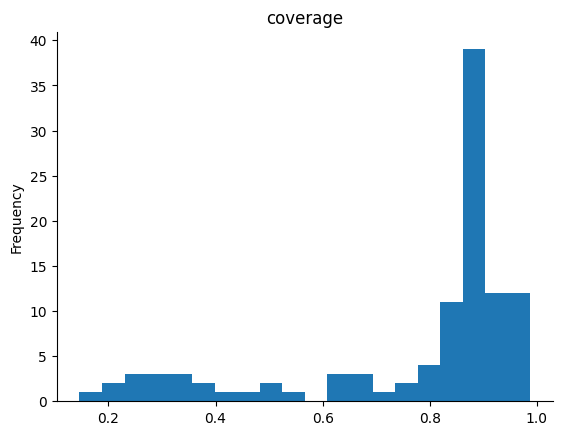

In [26]:
from matplotlib import pyplot as plt
cobertura_df['coverage'].plot(kind='hist', bins=20, title='coverage')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### También podemos exportar las tablas que creamos en dataframes como tablas en archivos de formato csv.

In [27]:
#con las herramientas .to_csv() podemos guardar el dataframe e indicar el separador de columnas y el decimal.
cobertura_df.to_csv('coberturas.csv', sep=';', decimal=',', index=False)

#ver contenido del directorio actual
!ls

coberturas.csv		nextclade_dataset_list.csv  sample_data  secuenciasSARS.fas
condacolab_install.log	nextclade_out		    sars-cov-2


## [6] Ejercicio 1 - Pandas📚

#### Usando los ejemplos anteriores, construya un dataframe con las columnas que tienen: nombre de la muestra (seqName), linaje y clado, deleciones, inserciones, y mutaciones en aminoácidos

####Para esto debe completar el código debajo

In [ ]:
# hacer un dataframe solo con las columnas linaje y clado, deleciones, inserciones, y mutaciones en aminoácidos
linajes_df=

#ver el dataframe creado en pantalla
linajes_df

#### Ahora que tenemos dos dataframes, podemos utilizar la herramienta de pandas .merge() para juntarlos.
#### Para esto se requiere que los dos dataframes tengan una columna en común para poder cruzar los datos

In [ ]:
#junta los dos dataframes basado en la columna 'seqName'
juntos_df=pd.merge(cobertura_df, linajes_df, on="seqName")

#### ❓En el cuadro debajo escriba una línea de código para guardar el nuevo dataframe (juntos_df) como un archivo csv.

In [ ]:
##Complete este cuadro con una línea de código para guardar el dataframe como un archivo .csv


## [7] Explorar la visualización de Auspice
#### Entre los archivos de resultado de nextclade encontramos una filogenia anotada con las mutaciones. Para visualizar el archivo de filogenia anotada primero debemos descargar el archivo

####En la parte izquierda de esta pantalla hay un ícono de de carpeta.
####Descargue el archivo que termina en **.auspice.json**

#### Ingrese a [auspice.us](https://auspice.us) donde podrá cargar el archivo con la visualización

####Ahora podemos explorar las mutaciones en un contexto evolutivo


#### [8] Cargar información adicional a la visualización de Auspice

#### En nuestra visualización de [auspice.us](https://auspice.us) podemos agregar información de nuestras muestras, incluyendo columnas para categorías como procedencia, desenlace clínico, intensidad de la enfermedad, e incluso las coordenadas geográficas

#### Para esto solo debemos construir un archivo de excel con la columna 'strain' indicando los nombres de nuestras muestras tal como aparecen en el archivo .auspice.json, y las columnas con nuestros datos (para coordenadas las columnas son 'latitude' y 'longitude')
#### Primero descarguemos y exploremos el archivo de metadatos

In [5]:
#Descarga el archivo de metadatosSARS.xlsx desde el repositorio con el comando curl
!wget url -o https://raw.github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/blob/master/data_curso/Modulo_3/metadatosSARS.xlsx


wget: https://raw.github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/blob/master/data_curso/Modulo_3/metadatosSARS.xlsx: No such file or directory


In [4]:
!ls
!head metadatosSARS.xlsx

sample_data
head: cannot open 'metadatosSARS.xlsx' for reading: No such file or directory


In [3]:
!ls

sample_data


#### Ahora veamos el contenido del archivo de metadatos
#### En la primera columna está el nombre de las secuencias, que debe coincidir con los encabezados del fasta

In [ ]:
#carga la librería de pandas con el nombre pd (solamente para tener que escribir menos letras)
import pandas as pd

#carga el archivo de excel como un dataframe de pandas
df_datos = pd.read_excel('/content/metadatosSARS.xlsx',sheet_name='Hoja1')
df_datos

#### Descargue el archivo [metadatosSARS.xlsx](https://github.com/diseasesdetectives/Curso_Bioinformatica_para_profesionales_de_la_salud_publica/blob/master/data_curso/Modulo_3/metadatosSARS.xlsx) a su computador y arrastrelo a la pantalla de Auspice con la filogenia previamente cargada

## [9] Ejercicio Auspice
#### ❓¿Existen mutaciones de aminoácidos es Spike comunes entre las muestras estudiadas?
#### Explore las mutaciones de interés en Spike S:L455F, S:L455S, y S:F456L
#### ¿De qué linajes o que características tienen las secuencias que corresponden a pacientes fallecidos?